# Kampus Merdeka 6: IBM & Skilvul
#capstone Project

## Kelompok: _ _ _
## Anggota

*   Nama
*   Nama
*   Nama
*   Nama
*   Nama


# Preparation | Persiapan
## Import Libraries

In [11]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!pip install kaggle

In [ ]:
# import necessary packages
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import os
import random
import seaborn as sns
import numpy as np




from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!kaggle datasets download -d thedevastator/uncovering-factors-that-affect-used-car-prices

Dataset URL: https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices
License(s): copyright-authors
 49% 9.00M/18.2M [00:00<00:00, 13.7MB/s]
100% 18.2M/18.2M [00:00<00:00, 29.0MB/s]


## Get Data | Mendapatkan Data

In [ ]:
zip_file_path =  '/content/uncovering-factors-that-affect-used-car-prices.zip'
# menentukan path untuk mengekstrak file zip
extract_path = '/content/dataset/'

# Cek apakah file zip ada dan valid
if os.path.isfile(zip_file_path):
    # Buat ekstrak file zip
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    # Cek isi folder
    extracted_files = os.listdir(extract_path)
    print("Isi folder setelah diekstrak:", extracted_files)
else:
    print("File zip tidak ditemukan atau tidak valid.")

Isi folder setelah diekstrak: ['autos.csv']


In [ ]:
# get data
df = pd.read_csv('/content/dataset/autos.csv')
df

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,...,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,...,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,...,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,...,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


## Explore Data (EDA) | Eksplorasi Data

In [ ]:
# check data
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [ ]:
df.shape

(371528, 21)

In [ ]:
# describe data
df.describe()

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,371528.000000,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,185763.500000,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,107251.039743,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,92881.750000,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,185763.500000,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,278645.250000,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,371527.000000,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


Bisa kita lihat terdapat banyak data yang anomali, kita akan periksa menggunakan  df.isnull().sum(axis=0)

In [ ]:
df.isnull().sum(axis=0)

index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [ ]:
df.drop(columns=['index','dateCrawled','dateCreated',	'nrOfPictures','lastSeen'],inplace=True)
df.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
0,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,70435
1,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,66954
2,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,90480
3,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,60437


In [ ]:
top_20_prices = df['price'].nlargest(20)

print(top_20_prices)

129969    2147483647
56973       99999999
69747       99999999
77520       99999999
108987      99999999
127820      99999999
139052      99999999
150909      99999999
160530      99999999
189737      99999999
246635      99999999
268173      99999999
280059      99999999
325589      99999999
362782      99999999
366653      99999999
251980      99000000
120919      74185296
183361      32545461
87799       27322222
Name: price, dtype: int64


In [ ]:
topS_20_prices = df['price'].nsmallest(20)

print(topS_20_prices)

7      0
40     0
115    0
119    0
157    0
159    0
237    0
346    0
430    0
484    0
490    0
498    0
543    0
545    0
588    0
604    0
615    0
642    0
649    0
763    0
Name: price, dtype: int64


In [ ]:
df = df[(df['price'] > 100) & (df['price'] < 25000)]

In [ ]:
top_20_prices = df['price'].nlargest(20)

print(top_20_prices)

750      24999
2281     24999
6558     24999
11679    24999
16514    24999
17999    24999
18061    24999
18589    24999
23040    24999
27253    24999
29122    24999
29389    24999
35133    24999
37161    24999
39566    24999
42755    24999
48503    24999
48951    24999
53099    24999
56697    24999
Name: price, dtype: int64


In [ ]:
topS_20_prices = df['price'].nsmallest(20)

print(topS_20_prices)

95141     101
162574    101
232618    101
348143    101
26899     105
119766    105
307806    105
352592    106
362317    108
2390      110
2711      110
21815     110
24219     110
39873     110
47351     110
49676     110
51721     110
66638     110
73132     110
77088     110
Name: price, dtype: int64


In [ ]:
#powerPS

In [ ]:
top_20_powerPS= df['powerPS'].nlargest(20)

print(top_20_powerPS)

230298    20000
313723    19312
119715    19211
138950    19208
67100     17932
206116    17700
158057    17410
55501     17322
196469    17019
183992    17011
227574    16312
326527    16311
190146    16051
260714    16011
215849    15033
155718    15020
273571    15017
170136    15001
284182    14009
238730    13636
Name: powerPS, dtype: int64


In [ ]:
topS_20_powerPS= df['powerPS'].nsmallest(20)

print(topS_20_powerPS)

0      0
15     0
32     0
37     0
54     0
55     0
70     0
71     0
92     0
96     0
101    0
114    0
130    0
134    0
150    0
152    0
163    0
165    0
167    0
171    0
Name: powerPS, dtype: int64


In [ ]:
df = df[(df['powerPS'] > 50) & (df['powerPS'] < 1500)]

In [ ]:
top_20_powerPS= df['powerPS'].nlargest(20)

print(top_20_powerPS)

84632     1436
277908    1433
267734    1432
339814    1416
85623     1405
118220    1403
147027    1403
231821    1401
8099      1400
58964     1400
97838     1400
205785    1400
325981    1400
338183    1400
348031    1400
68596     1399
217498    1399
1898      1398
273074    1394
284145    1390
Name: powerPS, dtype: int64


In [ ]:
topS_20_powerPS= df['powerPS'].nsmallest(20)

print(topS_20_powerPS)

937       51
10598     51
14884     51
18040     51
23653     51
28835     51
29106     51
34686     51
40238     51
50299     51
51235     51
79525     51
84045     51
92158     51
94075     51
97695     51
107500    51
110386    51
110501    51
115035    51
Name: powerPS, dtype: int64


In [ ]:
#yearOfRegistration

In [ ]:
top_20_yearOfRegistration = df['yearOfRegistration'].nlargest(20)

print(top_20_yearOfRegistration)

134985    9999
121777    9000
336021    8200
49186     6000
123844    6000
166023    6000
56268     5911
342422    5911
83812     5000
130940    5000
153664    5000
241124    5000
324927    5000
337891    5000
291972    4500
65676     4000
351235    4000
48979     2900
268359    2800
37201     2019
Name: yearOfRegistration, dtype: int64


In [ ]:
topS_20_yearOfRegistration = df['yearOfRegistration'].nsmallest(20)

print(topS_20_yearOfRegistration)

150620    1000
269064    1000
58964     1400
19125     1500
228892    1800
24893     1910
65859     1910
78450     1910
213134    1910
234842    1910
293235    1910
310265    1937
354533    1937
17460     1941
92325     1942
241947    1942
151072    1943
320676    1943
362834    1943
54849     1945
Name: yearOfRegistration, dtype: int64


In [ ]:
df = df[(df['yearOfRegistration'] > 1970) & (df['yearOfRegistration'] < 2024)]

In [ ]:
top_20_yearOfRegistration = df['yearOfRegistration'].nlargest(20)

print(top_20_yearOfRegistration)

37201     2019
59843     2019
65866     2019
66060     2019
78088     2019
106993    2019
156023    2019
187339    2019
302502    2019
22        2018
58        2018
168       2018
202       2018
524       2018
1107      2018
1115      2018
1190      2018
1365      2018
1684      2018
1942      2018
Name: yearOfRegistration, dtype: int64


In [ ]:
topS_20_yearOfRegistration = df['yearOfRegistration'].nsmallest(20)

print(topS_20_yearOfRegistration)

1026      1971
7498      1971
8425      1971
9322      1971
16029     1971
18488     1971
22396     1971
28155     1971
39545     1971
40500     1971
42633     1971
59334     1971
71525     1971
73252     1971
81532     1971
82508     1971
83883     1971
90089     1971
103097    1971
103480    1971
Name: yearOfRegistration, dtype: int64


In [ ]:
#tranlate from German to English

In [ ]:
#vehicleType

In [ ]:
df['vehicleType'].unique()

array(['coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', nan, 'andere'], dtype=object)

In [ ]:
df['vehicleType'].replace('andere','other', inplace=True)

In [ ]:
df['vehicleType'].replace('kleinwagen','smallCar', inplace=True)
df['vehicleType'].replace('kombi','stationWagon', inplace=True)

In [ ]:
df['vehicleType'].unique()

array(['coupe', 'suv', 'smallCar', 'limousine', 'cabrio', 'bus',
       'stationWagon', nan, 'other'], dtype=object)

In [ ]:
#fuelType

In [ ]:
df['fuelType'].unique()

array(['diesel', 'benzin', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [ ]:
df['fuelType'].replace('benzin','gasoline', inplace=True)
df['fuelType'].replace('andere','other', inplace=True)

In [ ]:
df['fuelType'].unique()

array(['diesel', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [ ]:
#gearbox

In [ ]:
df['gearbox'].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [ ]:
df['gearbox'].replace('manuell','Manual', inplace=True)
df['gearbox'].replace('automatik','Automatic', inplace=True)

In [ ]:
df['gearbox'].unique()

array(['Manual', 'Automatic', nan], dtype=object)

In [ ]:
#notRepairedDamage

In [ ]:
df['notRepairedDamage'].unique()

array(['ja', nan, 'nein'], dtype=object)

In [ ]:
df['notRepairedDamage'].replace('ja','Yes', inplace=True)
df['notRepairedDamage'].replace('nein','No', inplace=True)


In [ ]:
df['notRepairedDamage'].unique()

array(['Yes', nan, 'No'], dtype=object)

In [ ]:
# perform data visualization


In [ ]:
df['seller'].unique()

array(['privat'], dtype=object)

<Axes: title={'center': 'Test Type'}>

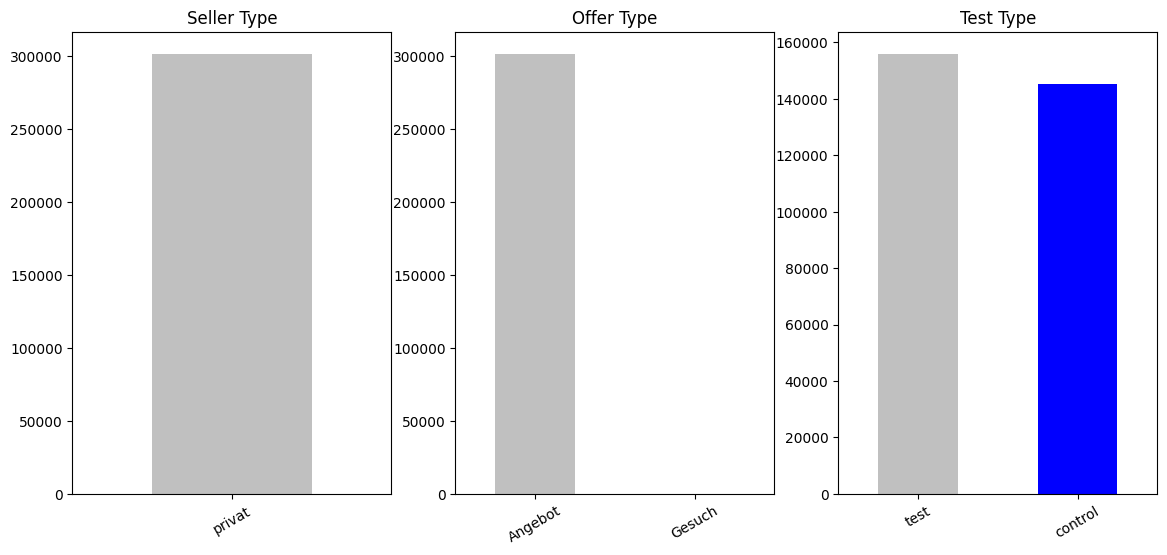

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))

df['seller'].value_counts().plot(kind='bar', title='Seller Type',  color=['silver', 'blue'], ax=axes[0], rot=30, xlabel='')

df['offerType'].value_counts().plot(kind='bar', title='Offer Type',  color=['silver', 'blue'], ax=axes[1], rot=30, xlabel='')

df['abtest'].value_counts().plot(kind='bar', title='Test Type',  color=['silver', 'blue'], ax=axes[2], rot=30, xlabel='')

In [ ]:
#karena seller type dan offer type pada data set ini hanya satu jenis saja yang terdeteksi, jadi dihapus saja

In [ ]:
df.drop('seller', axis=1, inplace=True)
df.drop('offerType', axis=1, inplace=True)
df.head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,Manual,190,NaN,125000,5,diesel,audi,Yes,66954
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,Automatic,163,grand,125000,8,diesel,jeep,NaN,90480
3,GOLF_4_1_4__3TÜRER,1500,test,smallCar,2001,Manual,75,golf,150000,6,gasoline,volkswagen,No,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,smallCar,2008,Manual,69,fabia,90000,7,diesel,skoda,No,60437
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,Manual,102,3er,150000,10,gasoline,bmw,Yes,33775


In [ ]:
##cf == categorical features ##
cf1 = df.dtypes==object
list_cf1 = df.columns[cf1].tolist()
list_cf1

['name',
 'abtest',
 'vehicleType',
 'gearbox',
 'model',
 'fuelType',
 'brand',
 'notRepairedDamage']

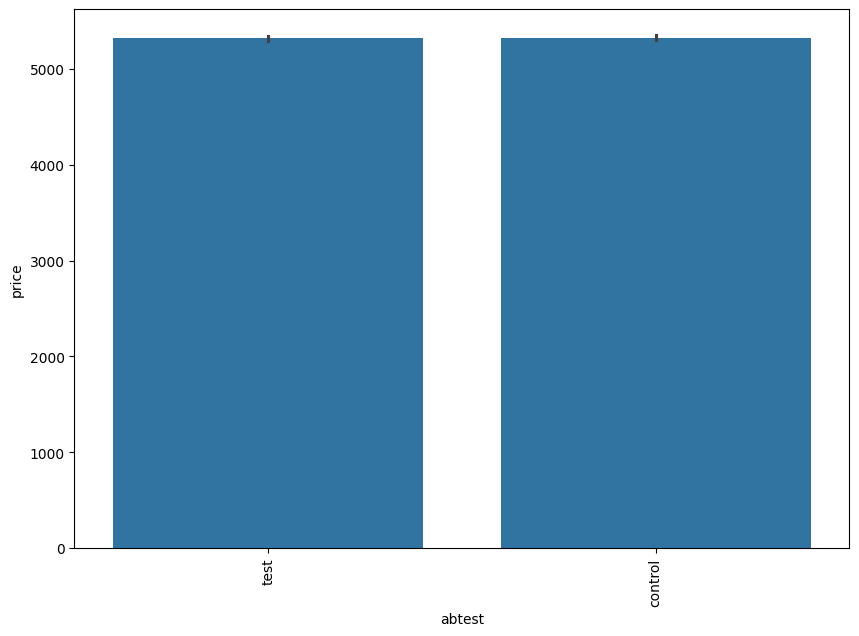

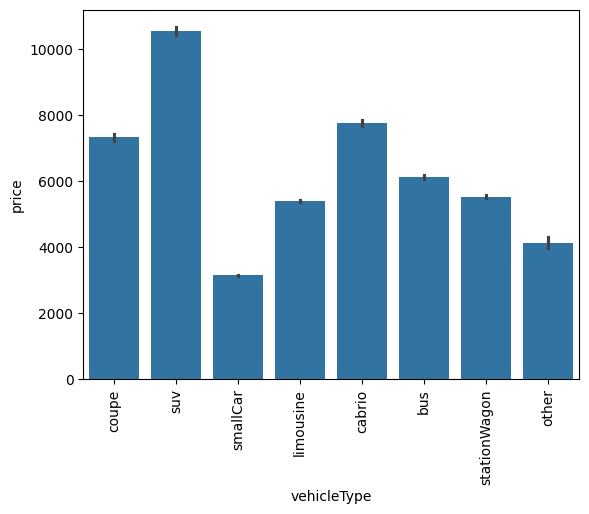

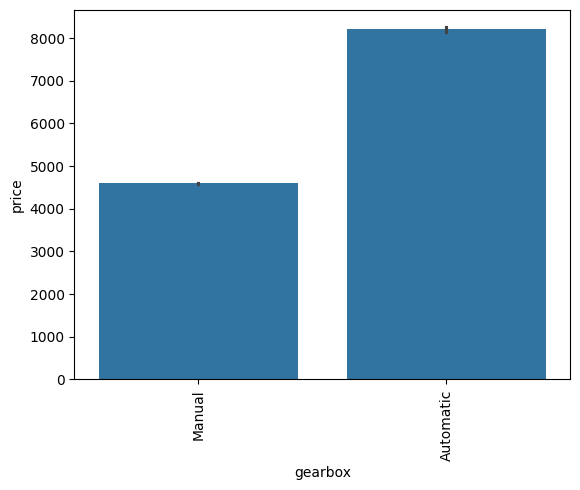

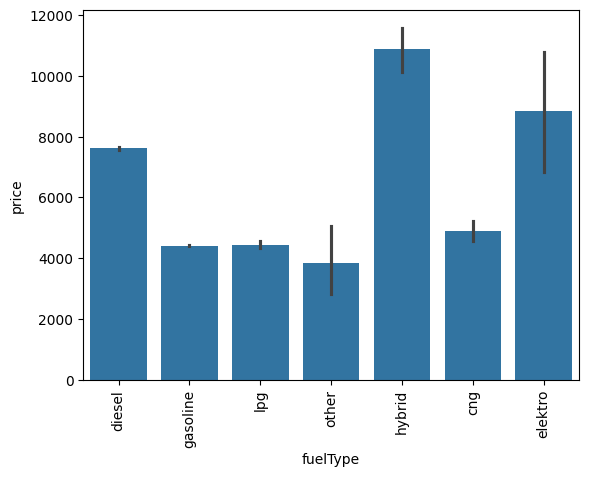

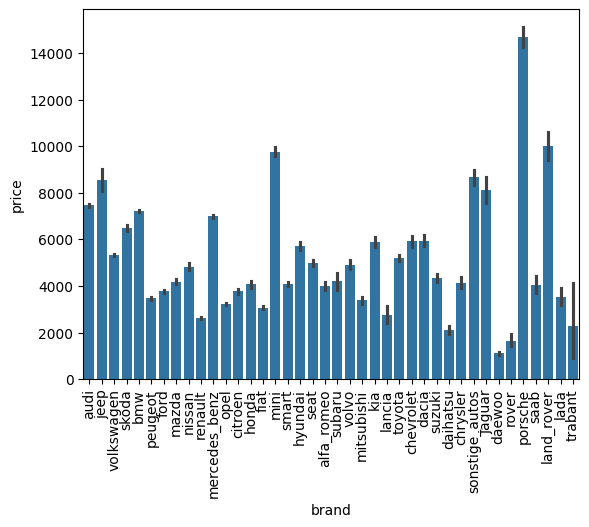

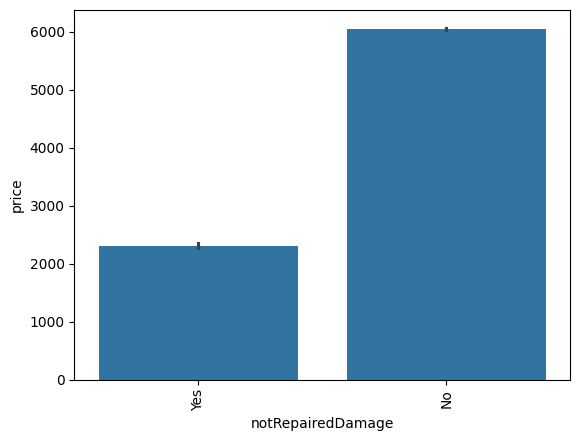

In [ ]:
plt.figure(figsize=(10,7))
for col in list_cf1:
  if col not in ['name', 'model']:
    sns.barplot(x=df[col],y=df['price'],data=df)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
df.head()

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,Manual,190,NaN,125000,5,diesel,audi,Yes,66954
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,Automatic,163,grand,125000,8,diesel,jeep,NaN,90480
3,GOLF_4_1_4__3TÜRER,1500,test,smallCar,2001,Manual,75,golf,150000,6,gasoline,volkswagen,No,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,smallCar,2008,Manual,69,fabia,90000,7,diesel,skoda,No,60437
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,Manual,102,3er,150000,10,gasoline,bmw,Yes,33775


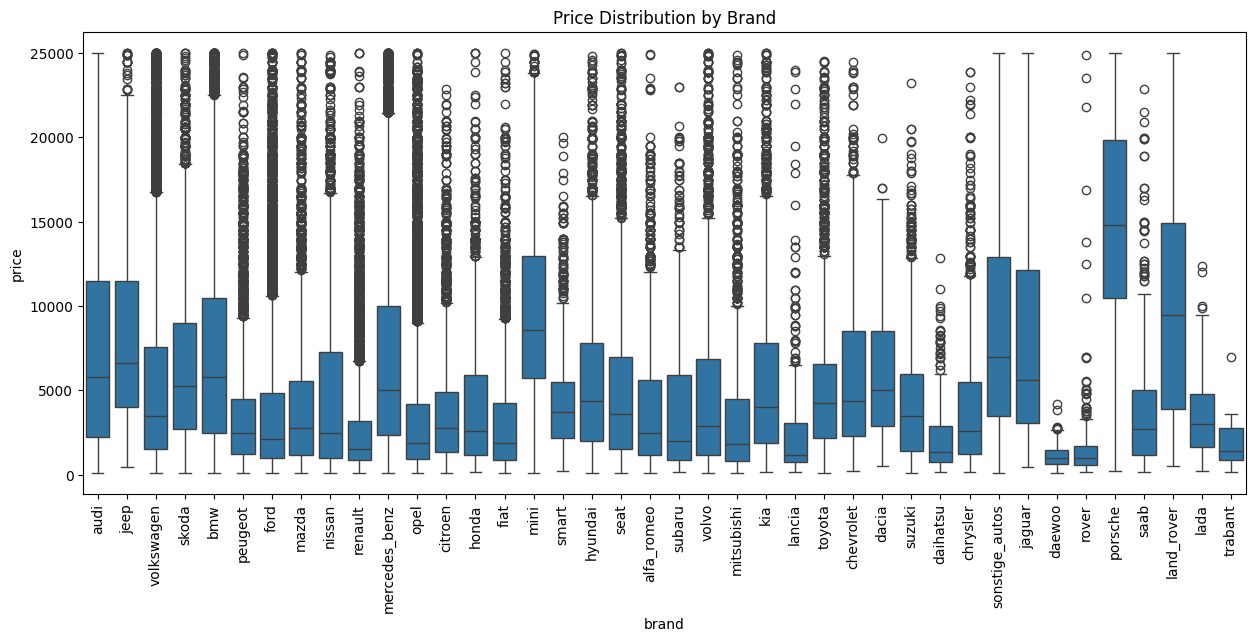

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='brand', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Brand')
plt.show()

<Axes: title={'center': 'Repaired/Damaged?'}, xlabel='Repaired/Damaged', ylabel='Count'>

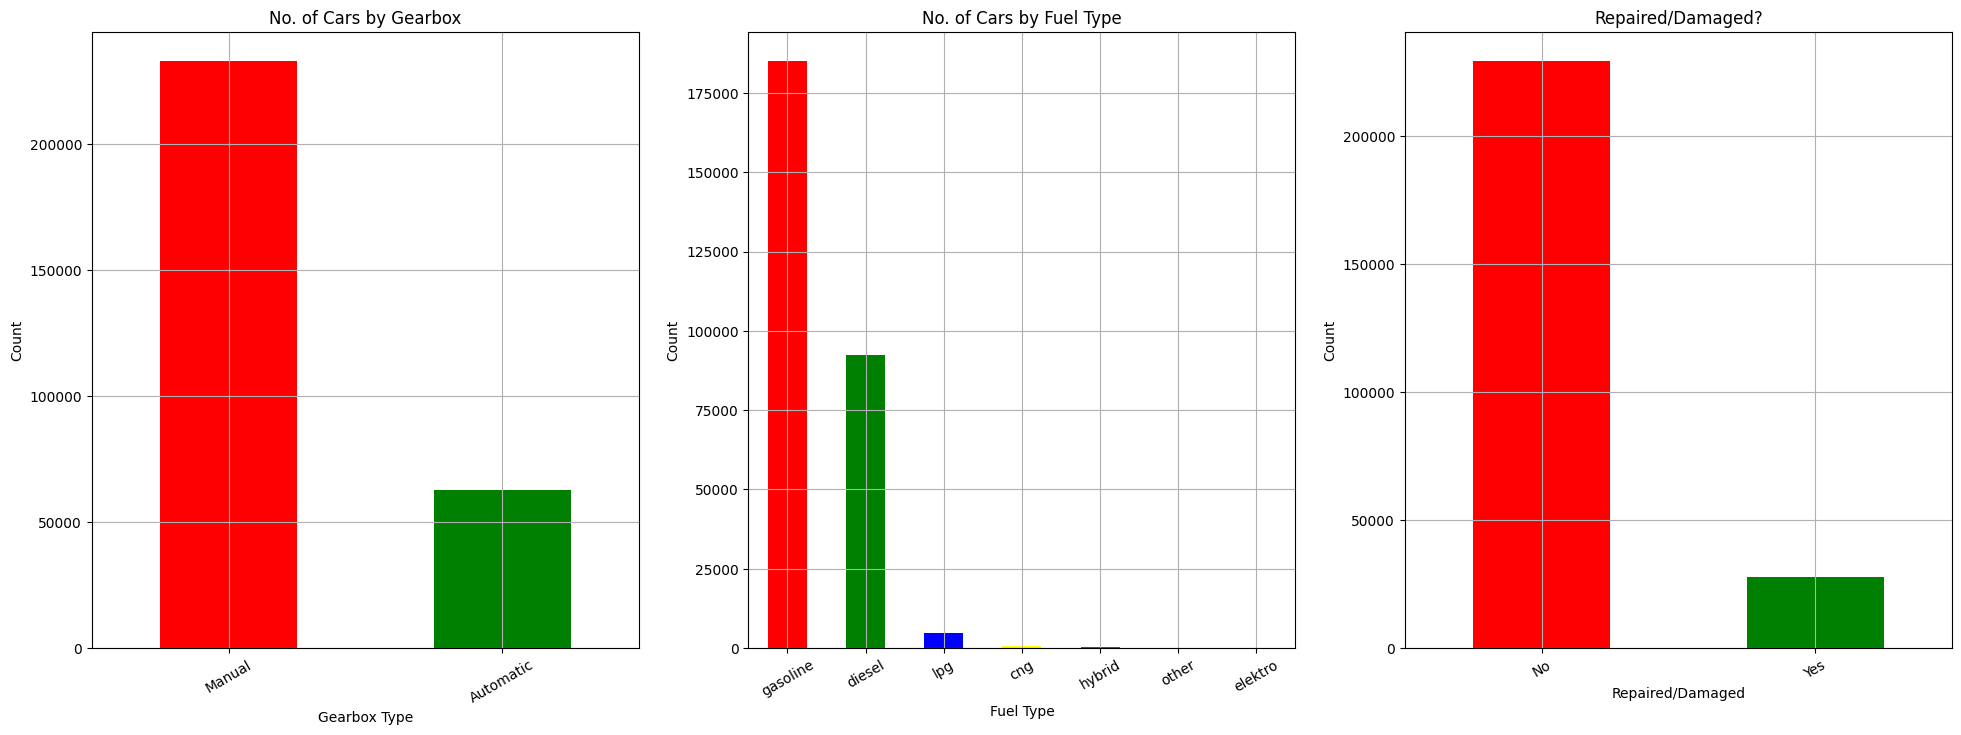

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

df['gearbox'].value_counts().plot(kind='bar', ax=axes[0], color=['red', 'green'], title='No. of Cars by Gearbox', xlabel='Gearbox Type', ylabel='Count', rot=30, grid=True)
df['fuelType'].value_counts().plot(kind='bar', ax=axes[1], color=['red', 'green', 'blue', 'yellow'], title='No. of Cars by Fuel Type', xlabel='Fuel Type', ylabel='Count', rot=30, grid=True)
df['notRepairedDamage'].value_counts().plot(kind='bar', ax=axes[2], color=['red', 'green', 'blue'], title='Repaired/Damaged?', xlabel='Repaired/Damaged', ylabel='Count', rot=30, grid=True)

## Preprocess Data | Proses Awal Data

In [ ]:
df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
1,A5_Sportback_2.7_Tdi,18300,test,coupe,2011,Manual,190,NaN,125000,5,diesel,audi,Yes,66954
2,"Jeep_Grand_Cherokee_""Overland""",9800,test,suv,2004,Automatic,163,grand,125000,8,diesel,jeep,NaN,90480
3,GOLF_4_1_4__3TÜRER,1500,test,smallCar,2001,Manual,75,golf,150000,6,gasoline,volkswagen,No,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,smallCar,2008,Manual,69,fabia,90000,7,diesel,skoda,No,60437
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,Manual,102,3er,150000,10,gasoline,bmw,Yes,33775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371519,Alfa_Romeo_159_Jtdm_1.9_150_ps_13_600_km_top_voll,5250,control,NaN,2016,Automatic,150,159,150000,12,NaN,alfa_romeo,No,51371
371520,turbo_defekt,3200,control,limousine,2004,Manual,225,leon,150000,5,gasoline,seat,Yes,96465
371524,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,Automatic,101,fortwo,125000,3,gasoline,smart,No,26135
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,test,bus,1996,Manual,102,transporter,150000,3,diesel,volkswagen,No,87439


In [ ]:
df.dropna(inplace=True)
df

,name,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
3,GOLF_4_1_4__3TÜRER,1500,test,smallCar,2001,Manual,75,golf,150000,6,gasoline,volkswagen,No,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,test,smallCar,2008,Manual,69,fabia,90000,7,diesel,skoda,No,60437
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,test,limousine,1995,Manual,102,3er,150000,10,gasoline,bmw,Yes,33775
6,Peugeot_206_CC_110_Platinum,2200,test,cabrio,2004,Manual,109,2_reihe,150000,8,gasoline,peugeot,No,67112
10,Mazda_3_1.6_Sport,2000,control,limousine,2004,Manual,105,3_reihe,150000,12,gasoline,mazda,No,96224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371513,Seat_Leon_1.9_TDI_4/5_Tueren,4400,control,limousine,2008,Manual,105,leon,150000,7,diesel,seat,No,45896
371517,Volkswagen_Golf_2.0_TDI_DPF_Team,7900,test,limousine,2010,Manual,140,golf,150000,7,diesel,volkswagen,No,75223
371520,turbo_defekt,3200,control,limousine,2004,Manual,225,leon,150000,5,gasoline,seat,Yes,96465
371524,Smart_smart_leistungssteigerung_100ps,1199,test,cabrio,2000,Automatic,101,fortwo,125000,3,gasoline,smart,No,26135


In [ ]:
df.drop('monthOfRegistration', axis=1, inplace=True)

In [ ]:
df.drop('abtest', axis=1, inplace=True)

In [ ]:
df

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
3,GOLF_4_1_4__3TÜRER,1500,smallCar,2001,Manual,75,golf,150000,gasoline,volkswagen,No,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,smallCar,2008,Manual,69,fabia,90000,diesel,skoda,No,60437
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,Manual,102,3er,150000,gasoline,bmw,Yes,33775
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,Manual,109,2_reihe,150000,gasoline,peugeot,No,67112
10,Mazda_3_1.6_Sport,2000,limousine,2004,Manual,105,3_reihe,150000,gasoline,mazda,No,96224
...,...,...,...,...,...,...,...,...,...,...,...,...
371513,Seat_Leon_1.9_TDI_4/5_Tueren,4400,limousine,2008,Manual,105,leon,150000,diesel,seat,No,45896
371517,Volkswagen_Golf_2.0_TDI_DPF_Team,7900,limousine,2010,Manual,140,golf,150000,diesel,volkswagen,No,75223
371520,turbo_defekt,3200,limousine,2004,Manual,225,leon,150000,gasoline,seat,Yes,96465
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,Automatic,101,fortwo,125000,gasoline,smart,No,26135


In [ ]:
##label_encoder = LabelEncoder()
##list_cf2 = ['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']
##for column in list_cf2 :
    ##df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
3,GOLF_4_1_4__3TÜRER,1500,smallCar,2001,Manual,75,golf,150000,gasoline,volkswagen,No,91074
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,smallCar,2008,Manual,69,fabia,90000,diesel,skoda,No,60437
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,Manual,102,3er,150000,gasoline,bmw,Yes,33775
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,Manual,109,2_reihe,150000,gasoline,peugeot,No,67112
10,Mazda_3_1.6_Sport,2000,limousine,2004,Manual,105,3_reihe,150000,gasoline,mazda,No,96224
...,...,...,...,...,...,...,...,...,...,...,...,...
371513,Seat_Leon_1.9_TDI_4/5_Tueren,4400,limousine,2008,Manual,105,leon,150000,diesel,seat,No,45896
371517,Volkswagen_Golf_2.0_TDI_DPF_Team,7900,limousine,2010,Manual,140,golf,150000,diesel,volkswagen,No,75223
371520,turbo_defekt,3200,limousine,2004,Manual,225,leon,150000,gasoline,seat,Yes,96465
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,Automatic,101,fortwo,125000,gasoline,smart,No,26135


In [ ]:
df['car_age'] = 2024 - df['yearOfRegistration']
df.drop(columns=['yearOfRegistration'], inplace=True)

In [ ]:
df.drop('name', axis=1, inplace=True)

In [ ]:
df

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,car_age
3,1500,smallCar,Manual,75,golf,150000,gasoline,volkswagen,No,91074,23
4,3600,smallCar,Manual,69,fabia,90000,diesel,skoda,No,60437,16
5,650,limousine,Manual,102,3er,150000,gasoline,bmw,Yes,33775,29
6,2200,cabrio,Manual,109,2_reihe,150000,gasoline,peugeot,No,67112,20
10,2000,limousine,Manual,105,3_reihe,150000,gasoline,mazda,No,96224,20
...,...,...,...,...,...,...,...,...,...,...,...
371513,4400,limousine,Manual,105,leon,150000,diesel,seat,No,45896,16
371517,7900,limousine,Manual,140,golf,150000,diesel,volkswagen,No,75223,14
371520,3200,limousine,Manual,225,leon,150000,gasoline,seat,Yes,96465,20
371524,1199,cabrio,Automatic,101,fortwo,125000,gasoline,smart,No,26135,24


In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,car_age
3,1500,smallCar,Manual,75,golf,150000,gasoline,volkswagen,No,91074,23
4,3600,smallCar,Manual,69,fabia,90000,diesel,skoda,No,60437,16
5,650,limousine,Manual,102,3er,150000,gasoline,bmw,Yes,33775,29
6,2200,cabrio,Manual,109,2_reihe,150000,gasoline,peugeot,No,67112,20
10,2000,limousine,Manual,105,3_reihe,150000,gasoline,mazda,No,96224,20


In [ ]:
dummies = pd.get_dummies(df1[['vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage']])
dummies.head()

,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_other,vehicleType_smallCar,vehicleType_stationWagon,vehicleType_suv,gearbox_Automatic,gearbox_Manual,...,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_volkswagen,brand_volvo,notRepairedDamage_No,notRepairedDamage_Yes
3,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
4,False,False,False,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
5,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
6,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
10,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
df2 = pd.concat([df1,dummies],axis=1)
df2.head()

,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,...,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_volkswagen,brand_volvo,notRepairedDamage_No,notRepairedDamage_Yes
3,1500,smallCar,Manual,75,golf,150000,gasoline,volkswagen,No,91074,...,False,False,False,False,False,False,True,False,True,False
4,3600,smallCar,Manual,69,fabia,90000,diesel,skoda,No,60437,...,False,True,False,False,False,False,False,False,True,False
5,650,limousine,Manual,102,3er,150000,gasoline,bmw,Yes,33775,...,False,False,False,False,False,False,False,False,False,True
6,2200,cabrio,Manual,109,2_reihe,150000,gasoline,peugeot,No,67112,...,False,False,False,False,False,False,False,False,True,False
10,2000,limousine,Manual,105,3_reihe,150000,gasoline,mazda,No,96224,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
df2.drop(columns=['vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage'],axis=1,inplace=True)

In [ ]:
df2.head() .T

,3,4,5,6,10
price,1500,3600,650,2200,2000
powerPS,75,69,102,109,105
kilometer,150000,90000,150000,150000,150000
postalCode,91074,60437,33775,67112,96224
car_age,23,16,29,20,20
...,...,...,...,...,...
brand_toyota,False,False,False,False,False
brand_volkswagen,True,False,False,False,False
brand_volvo,False,False,False,False,False
notRepairedDamage_No,True,True,False,True,True


In [ ]:
# split data


In [ ]:
X = df2.drop(columns=['price'])
X

,powerPS,kilometer,postalCode,car_age,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_other,vehicleType_smallCar,...,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_volkswagen,brand_volvo,notRepairedDamage_No,notRepairedDamage_Yes
3,75,150000,91074,23,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
4,69,90000,60437,16,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
5,102,150000,33775,29,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
6,109,150000,67112,20,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
10,105,150000,96224,20,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371513,105,150000,45896,16,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
371517,140,150000,75223,14,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
371520,225,150000,96465,20,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
371524,101,125000,26135,24,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
y = df2.price

In [ ]:
y.head()

3     1500
4     3600
5      650
6     2200
10    2000
Name: price, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#['vehicleType', 'gearbox', 'powerPS', 'kilometer', 'fuelType', 'brand','car_age']


# Model Training | Pelatihan Model



In [ ]:
# build model
## set model type
#(Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

#(Gradient Boosting)
gb_model = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)

#(Decision Tree)
dt_model = DecisionTreeRegressor()



In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
#(Gradient Boosting)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200)

In [ ]:

#(Decision Tree)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
rf_score = rf_model.score(X_test, y_test)

In [ ]:
gb_score = gb_model.score(X_test, y_test)

In [ ]:
dt_score = dt_model.score(X_test, y_test)

In [ ]:
print("Random Forest Score:", rf_score)
print("Gradient Boosting Score:", gb_score)
print("Decision Tree Score:", dt_score)

Random Forest Score: 0.8526060973570024
Gradient Boosting Score: 0.8872407411628549
Decision Tree Score: 0.8418999012502978


# Model Evaluation | Evaluasi Model

In [ ]:
# evaluate model
y_pred_rf = rf_model.predict(X_test)

In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("RandomForest:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R-squared:", r2_rf)

RandomForest:
MAE: 1366.8253835473206
MSE: 4270565.459938681
RMSE: 2066.534650069696
R-squared: 0.8526060973570024


In [ ]:
y_pred_gb = gb_model.predict(X_test)

In [ ]:
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting:")
print("MAE:", mae_gb)
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)
print("R-squared:", r2_gb)

Gradient Boosting:
MAE: 1149.5050037510068
MSE: 3267067.2764839404
RMSE: 1807.5030502004527
R-squared: 0.8872407411628549


In [ ]:
y_pred_dt = dt_model.predict(X_test)

In [ ]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree:")
print("MAE:", mae_dt)
print("MSE:", mse_dt)
print("RMSE:", rmse_dt)
print("R-squared:", r2_dt)

Decision Tree:
MAE: 1206.0472931460104
MSE: 4580764.935498836
RMSE: 2140.272163884499
R-squared: 0.8418999012502978


In [ ]:
X.head()

,powerPS,kilometer,postalCode,car_age,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_other,vehicleType_smallCar,...,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_volkswagen,brand_volvo,notRepairedDamage_No,notRepairedDamage_Yes
3,75,150000,91074,23,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
4,69,90000,60437,16,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
5,102,150000,33775,29,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
6,109,150000,67112,20,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
10,105,150000,96224,20,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
lr_model = gb_model

def pcp(vehicleType, gearbox, fuelType, brand, model, notRepairedDamage, powerPS, kilometer, car_age, postalCode, X, lr_model):
    def get_index(column_name):
        indices = np.where(X.columns == column_name)[0]
        return indices[0] if len(indices) > 0 else -1

    vehicleType_index = get_index('vehicleType_' + vehicleType)
    gearbox_index = get_index('gearbox_' + gearbox)
    fuelType_index = get_index('fuelType_' + fuelType)
    brand_index = get_index('brand_' + brand)
    model_index = get_index('model_' + model)
    notRepairedDamage_index = get_index('notRepairedDamage_' + notRepairedDamage)

    # Buat vektor fitur
    p = np.zeros(len(X.columns))
    p[X.columns.get_loc('powerPS')] = powerPS
    p[X.columns.get_loc('kilometer')] = kilometer
    p[X.columns.get_loc('car_age')] = car_age
    p[X.columns.get_loc('postalCode')] = postalCode

    # Setel indeks variabel kategorikal menjadi 1 jika ditemukan
    if vehicleType_index >= 0:
        p[vehicleType_index] = 1
    if gearbox_index >= 0:
        p[gearbox_index] = 1
    if fuelType_index >= 0:
        p[fuelType_index] = 1
    if brand_index >= 0:
        p[brand_index] = 1
    if model_index >= 0:
        p[model_index] = 1
    if notRepairedDamage_index >= 0:
        p[notRepairedDamage_index] = 1

    # Prediksi harga
    return lr_model.predict([p])[0]

# Contoh penggunaan
predicted_price = pcp('coupe', 'Manual', 'gasoline', 'toyota', 'supra', 'No', 382, 5000, 2, 40287, X, lr_model)
print("Predicted Price:", predicted_price)



Predicted Price: 6768.529568826061


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
predicted_price = pcp('limosine', 'Manual', 'diesel', 'porsche', '11 GT3 RS', 'No', 500, 5000, 3, 40287, X, lr_model)
print("Predicted Price:", predicted_price)

Predicted Price: 7332.196937145088


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
predicted_price = pcp('suv', 'Automatic', 'diesel', 'mercedes_benz', 'G-Class', 'No', 577, 5000, 3, 40287, X, lr_model)
print("Predicted Price:", predicted_price)

Predicted Price: 4460.862671095159


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


# Model Selection | Pemilihan Model

Berdasarkan hasil evaluasi ....., diputuskan untuk memilih model ..... .

In [ ]:
import pickle
from joblib import dump, load

# Simpan model Gradient Boosting ke file dengan joblib
dump(gb_model, 'gradient_boosting_model.joblib')

# Muat kembali model dengan joblib
loaded_gb_model = load('gradient_boosting_model.joblib')

# Simpan model yang dimuat kembali ke file .sav dengan pickle
with open('gradient_boosting_model.sav', 'wb') as f:
    pickle.dump(loaded_gb_model, f)


In [ ]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load the model
with open('gradient_boosting_model.sav', 'rb') as f:
    model = pickle.load(f)

# Define the endpoint for prediction
@app.route('/predict', methods=['POST'])
def predict():
    # Get the input data from the POST request
    data = request.get_json(force=True)
    # Perform prediction using the model
    predicted_price = model.predict([data['features']])[0]
    # Return the prediction as JSON
    return jsonify({'predicted_price': predicted_price})

if __name__ == '__main__':
    app.run(port=5000, debug=True)



 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [15]:
import joblib 
model = joblib.load('gradient_boosting_model.joblib')


ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

In [1]:
import pickle 
with open('gradient_boosting_model.sav', 'rb') as f:
    model = pickle.load(f)

c:\Python312\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DummyRegressor from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

# Conclusion | Kesimpulan

(tulis kesimpulan di sini)

In [4]:
import sys
!{sys.executable} -m pip install -U scikit-learn==1.3.2

   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.1 MB 93.9 kB/s eta 0:01:38
   ---------------------------------------- 0.0/9.1 MB 93.9 kB/s eta 0:01:38
   ---------------------------------------- 0.0/9.1 MB 93.5 kB/s eta 0:01:38
   ---------------------------------------- 0.0/9.1 MB 93.5 kB/s eta 0:01:38
   ---------------------------------------- 0.0/9.1 MB 93.5 kB/s eta 0:01:38
   ---------------------------------------- 0.0/9.1 MB 93.7 kB/s eta 0:01:38
   ---------------------------------------- 0.0/9.1 MB 93.7 kB/s eta 0:01:38
   ---------------------------------------- 0.0/9.1 MB 93.7 kB/s eta 0:01:38
   ------------------------------------

  You can safely remove it manually.


In [5]:
import sklearn

print(sklearn.__version__)

1.3.2


In [9]:
import joblib 
model = joblib.load('gradient_boosting_model.joblib')

ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]